In [4]:
import matplotlib.pyplot as plt
import librosa

In [3]:
# Load audio for B/C major scales, and create chromagrams
B, B_sr = librosa.load("../chords/BMajor.wav")
C, C_sr = librosa.load("../chords/CMajorScale.wav")

# Using the ratio of audio clip durations, we can the adjust 
# hop length for the second audio clip such that its chromagram 
# shares the same shape as the chromagram for the first clip
b_duration = librosa.core.audio.get_duration(y=B, sr=B_sr)
c_duration = librosa.core.audio.get_duration(y=C, sr=C_sr)
hop_length = int(512 * (c_duration/b_duration))

# Construct the chromagrams for both scales
b_chromagram = librosa.feature.chroma_stft(y=B, sr=B_sr) 
c_chromagram = librosa.feature.chroma_stft(y=C, sr=C_sr, hop_length=hop_length) 

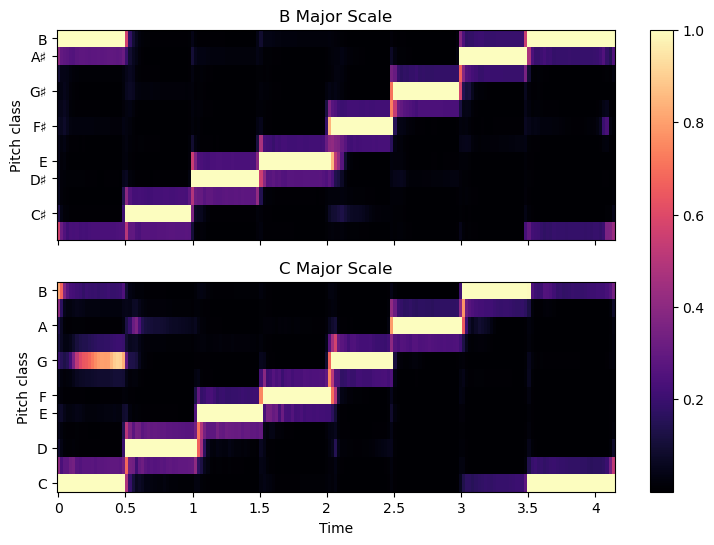

In [6]:
# Plotting both chromagrams next to each to see the
# similarity in the overall skeleton between the two
fig, ax = plt.subplots(nrows=2, sharex=True)
fig.set_size_inches((9, 6))
img = librosa.display.specshow(b_chromagram, y_axis='chroma', x_axis='time', 
                               ax=ax[0], key='B:maj')
ax[0].set(title='B Major Scale')
ax[0].label_outer()

librosa.display.specshow(c_chromagram, y_axis='chroma', x_axis='time',
                         ax=ax[1], key='C:maj')
ax[1].set(title='C Major Scale')
fig.colorbar(img, ax=ax)